In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.5f}'.format
pd.options.mode.chained_assignment = None

# 1. Dataset

Vamos a trabajar nuevamente con el dataset de indicadores de paises. El dataset contiene información de expectativa de vida, población y PBI per capita de países desde 1952 hasta 2007 en intervalos de 5 años. Vamos a trabajar con la información más reciente.

In [2]:
# Cargamos el dataset desde el link
paises = pd.read_table('https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv')

In [3]:
# Nos quedamos con la información para el año 2007
paises_2007 = paises.query("year==2007")

# 2. Objetivo: medir similitud entre países

Queremos poder comparar que tan parecidos son dos paises en base a sus variables.

## 2.1 Distancia euclidea

Para ello vamos a utilizar la distancia euclidea entre los puntos.

La fórmula para calcular la distancia euclidea entre dos puntos $(x_1, y_1)$ y $(x_2, y_2)$es:

$d=\sqrt{(x_1 - x_2)^2+(y_1 - y_2)^2}$

En términos gráficos:

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Distance_Formula.svg/1200px-Distance_Formula.svg.png" width="500"/>
<div>

---

El cálculo de la distancia euclidea como código lo hacemos de la siguiente manera:

```
distancia = np.sqrt(np.sum(np.square(punto1 - punto2)))
```








Por ejemplo, si quisieramos ver cuan parecido es un pais a otro en terminos de expectativa de vida y PBI per capita deberíamos medir la distancia de los puntos en este espacio

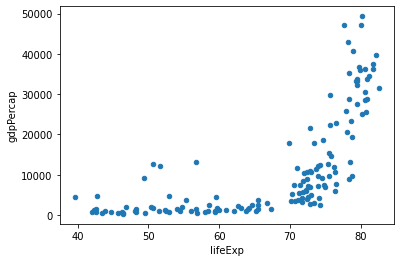

In [4]:
paises_2007.plot.scatter(x='lifeExp', y='gdpPercap')

Vamos a medir la distancia entre Argentina y Uruguay

In [5]:
paises_2007.loc[paises_2007.country.isin(["Argentina", "Uruguay"])]

,country,continent,year,lifeExp,pop,gdpPercap
59,Argentina,Americas,2007,75.32000,40301927,12779.37964
1631,Uruguay,Americas,2007,76.38400,3447496,10611.46299


Vemos que son dos países bastante parecidos en estas dos variables. Procedemos a calcular la distancia entre ambos:

In [6]:
# Obtenemos nuestros puntos
punto1 = paises_2007.loc[paises_2007.country=='Uruguay', ['lifeExp', 'gdpPercap']].values
punto2 = paises_2007.loc[paises_2007.country=='Argentina', ['lifeExp', 'gdpPercap']].values

In [7]:
# Calculamos la distancia
np.sqrt(np.sum(np.square(punto1 - punto2)))

2167.9169111022743

¿Qué pasó? Para ser dos países tan similares la distancia entre ambos parece muy elevada

## 2.2 Escala de las variables

El dataset cuenta con 3 variables:

* **Esperanza de vida**: medida en años
* **Población**: medida en cantidad de personas
* **PBI per capita**: medida en dolares por persona


Vamos a utilizar el método `pandas.describe()` para conocer las variables numéricas del dataset 

In [8]:
paises_2007.describe()

,year,lifeExp,pop,gdpPercap
count,142.00000,142.00000,142.00000,142.00000
mean,2007.00000,67.00742,44021219.57042,11680.07182
std,0.00000,12.07302,147621397.90362,12859.93734
min,2007.00000,39.61300,199579.00000,277.55186
25%,2007.00000,57.16025,4508033.50000,1624.84225
50%,2007.00000,71.93550,10517531.00000,6124.37111
75%,2007.00000,76.41325,31210041.75000,18008.83564
max,2007.00000,82.60300,1318683096.00000,49357.19017


Vemos que hay diferencias en las unidades de medida de la variable y esto puede afectar la medición de distancia que estamos intentando hacer.

Para resolver este problema podemos utilizar las técnicas es reescalamiento

# 3 Escalamiento

Recordemos que vimos dos técnicas de escalamiento: la normalización y la estandarización. 

Antes de ver como las podemos implementar en código veamos la distribución de las variables

## 3.1 Distribución de las variables

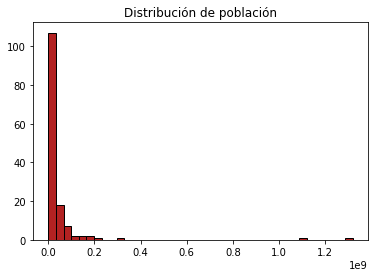

In [9]:
# Distribucion de la poblacion
plt.hist(paises_2007['pop'], bins=40, ec='black', color="firebrick")
plt.title("Distribución de población")
plt.show()

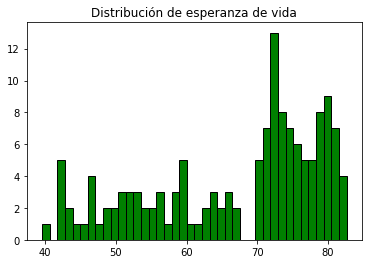

In [10]:
# Distribucion de la esperanza de vida
plt.hist(paises_2007['lifeExp'], bins=40, ec='black', color="green")
plt.title("Distribución de esperanza de vida")
plt.show()

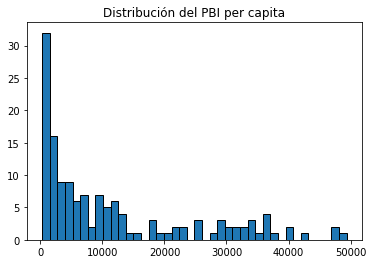

In [11]:
# Distribucion del PBI per capita
plt.hist(paises_2007['gdpPercap'], bins=40, ec='black')
plt.title("Distribución del PBI per capita")
plt.show()

Ninguna de las variables tiene una distribución que se aproxime a una normal (una campana) ¿Qué tipo de escalamiento nos conviene probar primero?

## 3.2 Normalización 

La fórmula para normalizar una variable es:

$ x_e = \frac{x-min(X)}{max(X)-min(X)}$

¿Qué datos necesitamos para normalizar una variable?

El mínimo y máximo


### 3.2.1 Población

In [12]:
# Obtenemos el minimo y maximo de la variable
min_poblacion = paises_2007['pop'].min()
max_poblacion = paises_2007['pop'].max()
rango_poblacion = max_poblacion - min_poblacion

In [13]:
# Normalizamos
poblacion_norm = (paises_2007['pop'] - min_poblacion)/ rango_poblacion

In [14]:
poblacion_norm

11     0.02404
23     0.00258
35     0.02513
47     0.00927
59     0.03042
         ...  
1655   0.06452
1667   0.00290
1679   0.01670
1691   0.00876
1703   0.00919
Name: pop, Length: 142, dtype: float64

### 3.2.2 Esperanza de vida

In [15]:
# Obtenemos el minimo y maximo de la variable
min_exp_vida = paises_2007['lifeExp'].min()
max_exp_vida = paises_2007['lifeExp'].max()
rango_exp_vida = max_exp_vida - min_exp_vida

In [16]:
# Normalizamos
exp_vida_norm = (paises_2007['lifeExp'] - min_exp_vida)/ rango_exp_vida
exp_vida_norm

11     0.09805
23     0.85625
35     0.76036
47     0.07253
59     0.83059
         ...  
1655   0.80568
1667   0.78644
1679   0.53699
1691   0.06446
1703   0.09011
Name: lifeExp, Length: 142, dtype: float64

### 3.2.3 PBI per capita



In [17]:
# Obtenemos el minimo y maximo de la variable
min_pbi_per_cap = paises_2007['gdpPercap'].min()
max_pbi_per_cap = paises_2007['gdpPercap'].max()
rango_pbi_per_cap = max_pbi_per_cap - min_pbi_per_cap

In [18]:
# Normalizamos
pbi_per_cap_norm = (paises_2007['gdpPercap'] - min_pbi_per_cap)/ rango_pbi_per_cap
pbi_per_cap_norm

11     0.01420
23     0.11531
35     0.12115
47     0.09209
59     0.25473
         ...  
1655   0.04409
1667   0.05599
1679   0.04082
1691   0.02025
1703   0.00392
Name: gdpPercap, Length: 142, dtype: float64

### 3.2.4 Dataset normalizado

Creamos un dataframe con los datos normalizados

In [19]:
paises_2007_norm = pd.DataFrame({'pais':paises_2007['country'], 'continente':paises_2007['continent'], 'exp_vida':exp_vida_norm,
                                 'poblacion': poblacion_norm, 'pbi_per_cap': pbi_per_cap_norm})

In [20]:
paises_2007_norm.sample(10)

,pais,continente,exp_vida,poblacion,pbi_per_cap
947,Malaysia,Asia,0.80549,0.01867,0.24805
539,France,Europe,0.95473,0.04618,0.61517
11,Afghanistan,Asia,0.09805,0.02404,0.01420
407,Czech Republic,Europe,0.85771,0.00761,0.45957
167,Botswana,Africa,0.25855,0.00109,0.25046
1319,Saudi Arabia,Asia,0.77144,0.02078,0.43556
935,Malawi,Africa,0.20214,0.00996,0.00982
1667,West Bank and Gaza,Asia,0.78644,0.00290,0.05599
1007,Mongolia,Asia,0.63247,0.00203,0.05742
1199,Paraguay,Americas,0.74759,0.00491,0.07937


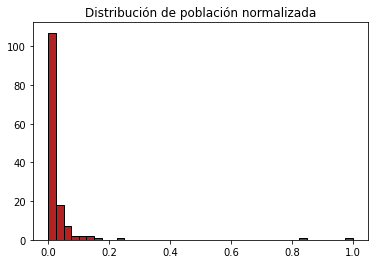

In [21]:
# Observemos como quedan las distribuciones de las variables transformadas
# Distribucion de la poblacion
plt.hist(paises_2007_norm['poblacion'], bins=40, ec='black', color="firebrick")
plt.title("Distribución de población normalizada")
plt.show()

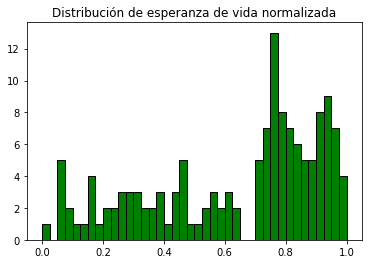

In [22]:
# Distribucion de la esperanza de vida
plt.hist(paises_2007_norm['exp_vida'], bins=40, ec='black', color="green")
plt.title("Distribución de esperanza de vida normalizada")
plt.show()

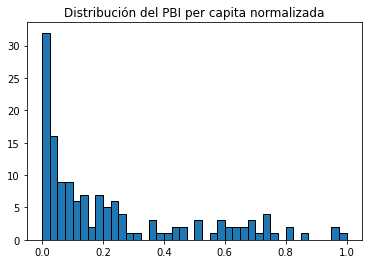

In [23]:
# Distribucion del PBI per capita
plt.hist(paises_2007_norm['pbi_per_cap'], bins=40, ec='black')
plt.title("Distribución del PBI per capita normalizada")
plt.show()

Observamos que la forma de la distribución no ha cambiado pero si los valores de las variables. Ahora todos se encuentran entre cero y uno

# 4. Medicion de distancia

Ahora que contamos con las variables escaladas podemos realizar nuestra medición de distancia. Retomemos primero nuestro caso de Uruguay y Argentina

In [24]:
paises_2007_norm.loc[paises_2007.country.isin(["Argentina", "Uruguay"])]

,pais,continente,exp_vida,poblacion,pbi_per_cap
59,Argentina,Americas,0.83059,0.03042,0.25473
1631,Uruguay,Americas,0.85534,0.00246,0.21055


In [25]:
# Obtenemos nuestros puntos
punto1 = paises_2007_norm.loc[paises_2007_norm.pais=='Uruguay', ['exp_vida', 'pbi_per_cap']].values
punto2 = paises_2007_norm.loc[paises_2007_norm.pais=='Argentina', ['exp_vida', 'pbi_per_cap']].values

In [26]:
# Calculamos la distancia
np.sqrt(np.sum(np.square(punto1 - punto2)))

0.05063272425138454

Ahora veamos la similitud entre Uruguay y Paraguay

In [27]:
paises_2007_norm.loc[paises_2007.country.isin(["Paraguay", "Uruguay"])]

,pais,continente,exp_vida,poblacion,pbi_per_cap
1199,Paraguay,Americas,0.74759,0.00491,0.07937
1631,Uruguay,Americas,0.85534,0.00246,0.21055


In [28]:
# Punto de paraguay
punto3 = paises_2007_norm.loc[paises_2007_norm.pais=='Paraguay', ['exp_vida', 'pbi_per_cap']].values

In [29]:
# Calculamos la distancia
np.sqrt(np.sum(np.square(punto1 - punto3)))

0.1697624861388704

Según nuestro cálculo Uruguay se parece más a Argentina que a Paraguay en términos de PBI per capita y Expectativa de vida